In [22]:
import os
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

original_df = pd.read_csv("healthcare-dataset-stroke-data.csv")






print("Shape of the dataset:", original_df.shape)


print("Size of the dataset:", original_df.size)

original_df

Shape of the dataset: (5110, 12)
Size of the dataset: 61320


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
def preprocessed(dataframe):
    
    # Drop ID column
    dataframe.drop("id", axis=1, inplace=True)
    
    # There is 1 row with "Other" as the gender
    # While it is a controversial topic, 
    # for the sake of this dataset (and my personal beliefs), this row will be dropped
    dataframe = dataframe[dataframe['gender'] != "Other"]
    dataframe['gender'] = labelencoder.fit_transform(dataframe['gender'])
    dataframe['gender'] = dataframe['gender'].astype(int)
    
    # Age is an integer... not a float
    dataframe['age'] = dataframe['age'].astype(int)
    
    # ever_married is basically a binary category (Yes / No)
    dataframe['ever_married'] = labelencoder.fit_transform(dataframe['ever_married'])
    dataframe['ever_married'] = dataframe['ever_married'].astype(int)
    
    # work_type has multiple categories, but non-ordinal (Private, Self-employed, Govt_job, children, never_worked)
    dataframe = pd.get_dummies(dataframe, columns=['work_type'], prefix='work')
    
    # residence_type is binary category (Urban / Rural)
    dataframe.rename(columns={"Residence_type": "residence_type"}, inplace=True)
    dataframe = pd.get_dummies(dataframe, columns=['residence_type'], prefix='residence')
    
    # avg_glucose_level may require some form of grouping?
    # Addressed later
    
    # BMI has 201 missing values (4% of the values)
    ## We mark down the missing values into a separate column to see if there are correlation between missing values and other categories
    dataframe['bmi_missing'] = dataframe['bmi'].isnull().astype(int)
    
    ## We then use interpolation to fill in the null values
    dataframe['bmi'].interpolate(inplace=True)

    
    
    # smoking_status is categorical (never smoked, formerly smoked, smokes, and unknown)
    dataframe = pd.get_dummies(dataframe, columns=['smoking_status'], prefix='smoking')



    
    
    return dataframe

#######################

df = original_df.copy()

df = preprocessed(df)
df

/var/folders/rh/h2tzx6sx7q91t3_t9kp0sbxr0000gn/T/ipykernel_75140/3364749320.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['gender'] = labelencoder.fit_transform(dataframe['gender'])
/var/folders/rh/h2tzx6sx7q91t3_t9kp0sbxr0000gn/T/ipykernel_75140/3364749320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['gender'] = dataframe['gender'].astype(int)
/var/folders/rh/h2tzx6sx7q91t3_t9kp0sbxr0000gn/T/ipykernel_75140/3364749320.py:14: SettingWithCopyWarning: 
A value is trying to b

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,bmi_missing,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,1,67,0,1,1,228.69,36.60,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,61,0,0,1,202.21,34.55,1,0,0,0,1,0,1,0,1,0,0,1,0
2,1,80,0,1,1,105.92,32.50,1,0,0,1,0,0,1,0,0,0,0,1,0
3,0,49,0,0,1,171.23,34.40,1,0,0,1,0,0,0,1,0,0,0,0,1
4,0,79,1,0,1,174.12,24.00,1,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,83.75,29.30,0,0,0,1,0,0,0,1,1,0,0,1,0
5106,0,81,0,0,1,125.20,40.00,0,0,0,0,1,0,0,1,0,0,0,1,0
5107,0,35,0,0,1,82.99,30.60,0,0,0,0,1,0,1,0,0,0,0,1,0
5108,1,51,0,0,1,166.29,25.60,0,0,0,1,0,0,1,0,0,0,1,0,0


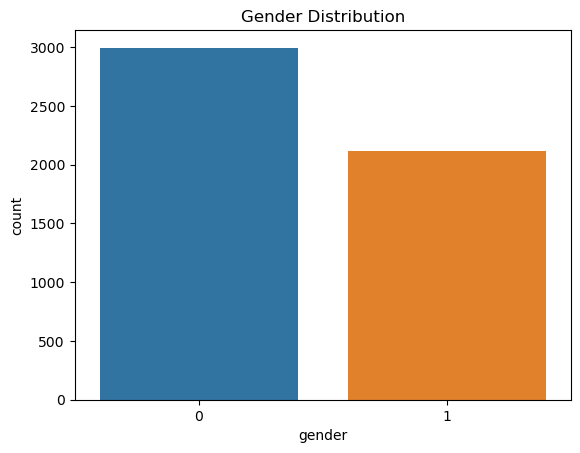

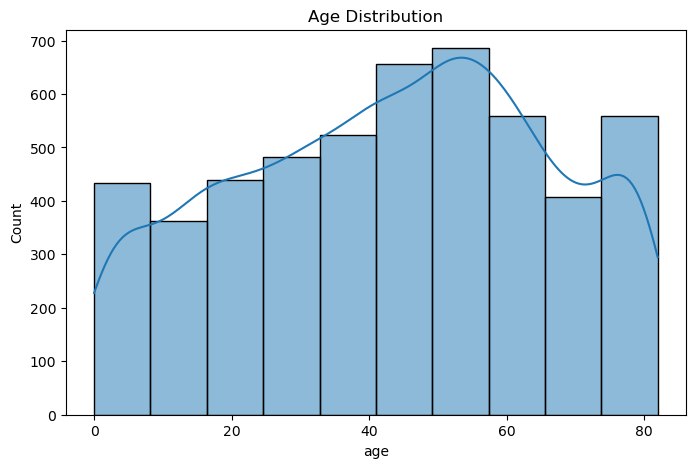

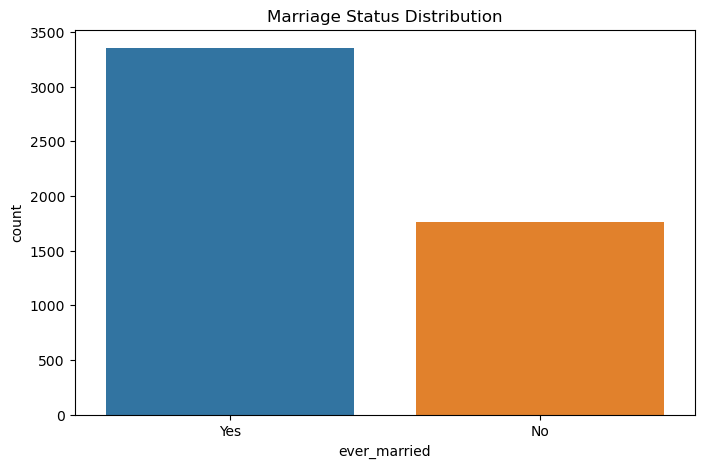

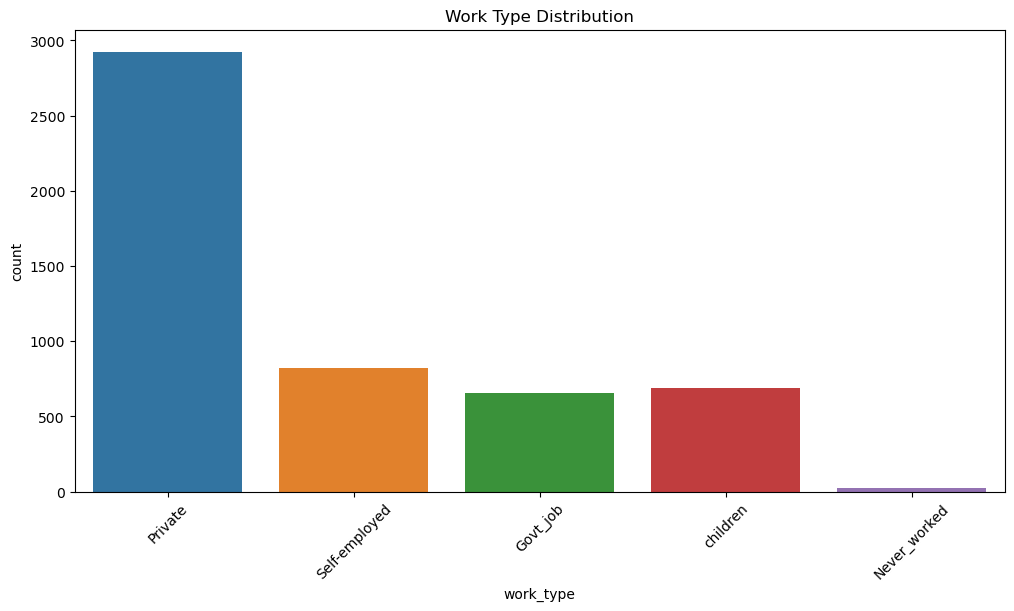

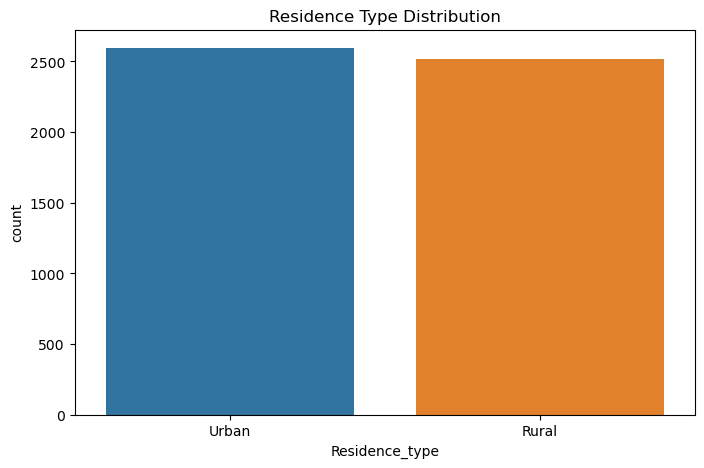

In [5]:
#DATA VISUALISATION

# Bar plot for gender distribution
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Age distribution histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

# Bar plot for marriage status
plt.figure(figsize=(8, 5))
sns.countplot(x='ever_married', data=original_df)
plt.title('Marriage Status Distribution')
plt.show()

# Bar plot for work type
plt.figure(figsize=(12, 6))
sns.countplot(x='work_type', data=original_df)
plt.title('Work Type Distribution')
plt.xticks(rotation=45)
plt.show()

# Bar plot for residence type
plt.figure(figsize=(8, 5))
sns.countplot(x='Residence_type', data=original_df)
plt.title('Residence Type Distribution')
plt.show()



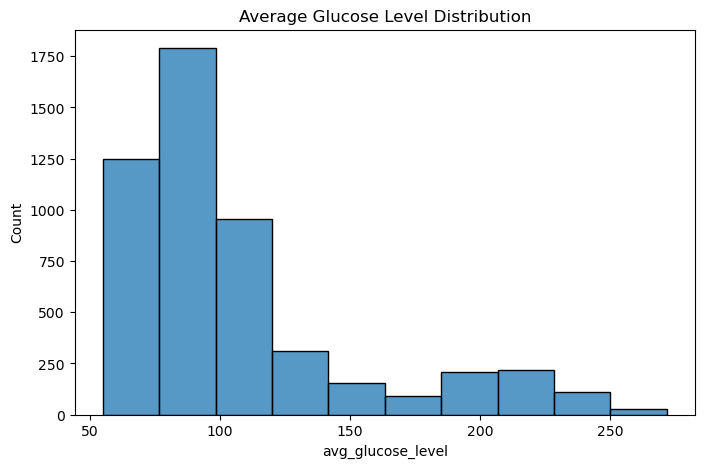

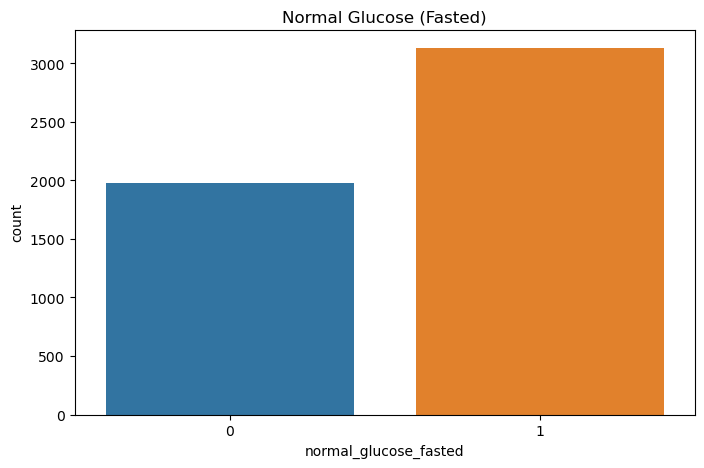

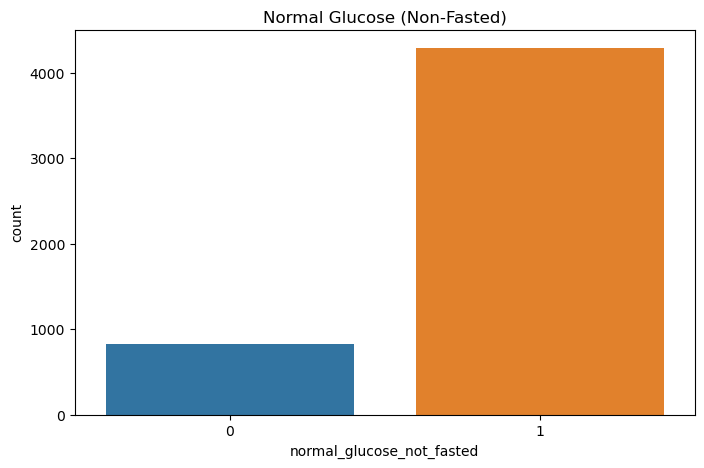

In [7]:
#GLUCOSE LEVELS

healthy_level_fasted = 100
healthy_level_not_fasted = 140

df['normal_glucose_fasted'] = np.where(df['avg_glucose_level'] < healthy_level_fasted, 1, 0)
df['normal_glucose_not_fasted'] = np.where(df['avg_glucose_level'] < healthy_level_not_fasted, 1, 0)


# Distribution of average glucose level
plt.figure(figsize=(8, 5))
sns.histplot(original_df['avg_glucose_level'], bins=10)
plt.title('Average Glucose Level Distribution')
plt.show()


# Bar plot for normal_glucose_fasted
plt.figure(figsize=(8, 5))
sns.countplot(x='normal_glucose_fasted', data=df)
plt.title('Normal Glucose (Fasted)')
plt.show()


# Bar plot for normal_glucose_not_fasted
plt.figure(figsize=(8, 5))
sns.countplot(x='normal_glucose_not_fasted', data=df)
plt.title('Normal Glucose (Non-Fasted)')
plt.show()



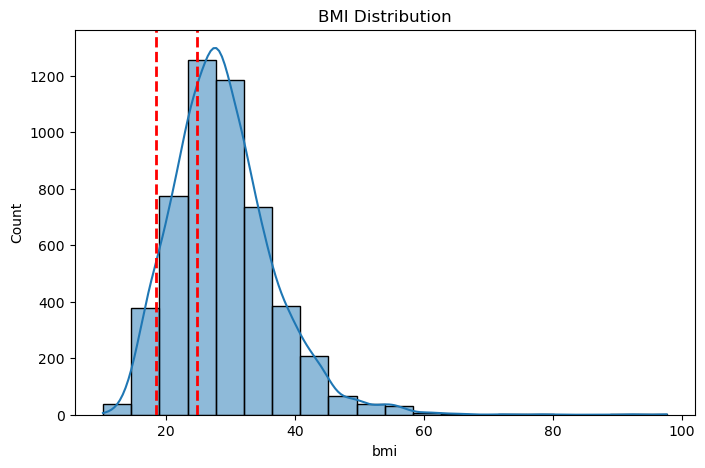

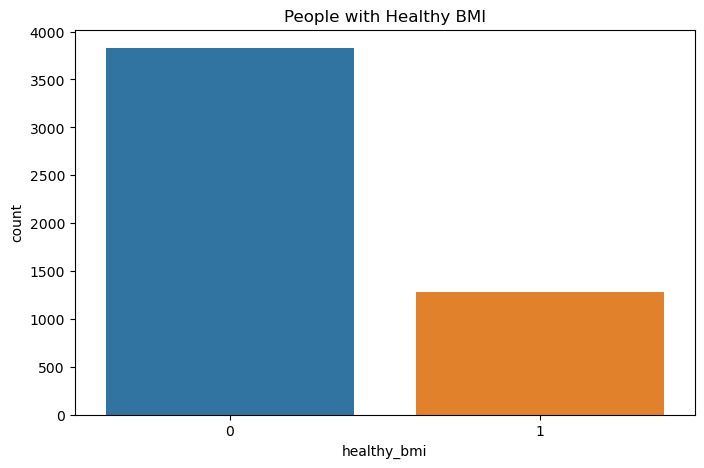

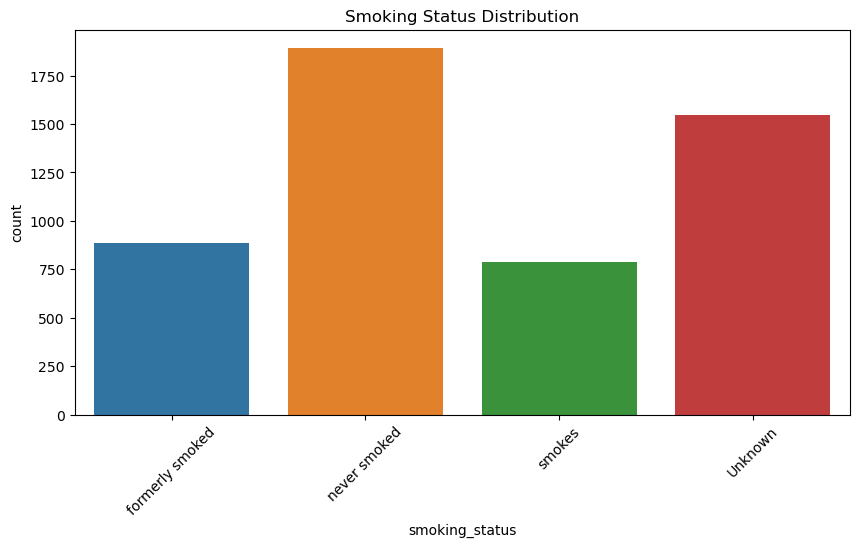

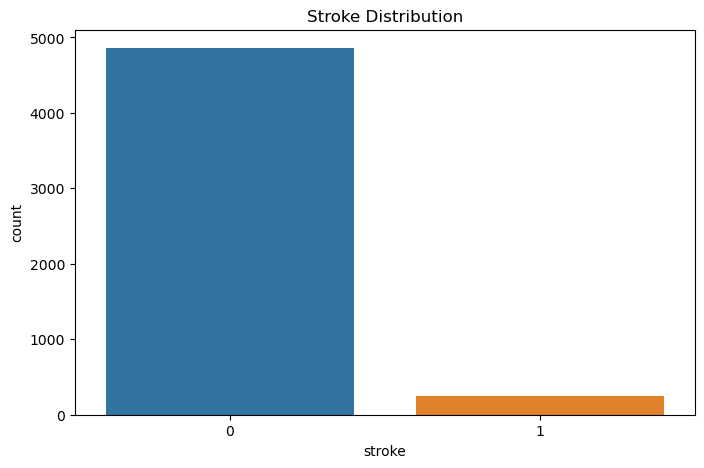

In [9]:
#BMI DISTRIBUTION

# Distribution of BMI (excluding null values)
plt.figure(figsize=(8, 5))
healthy_bmi_start = 18.5
healthy_bmi_end = 24.9
sns.histplot(df['bmi'].dropna(), bins=20, kde=True)


plt.axvline(x=healthy_bmi_start, color='red', linestyle='dashed', linewidth=2, label=f'Healthy BMI Start: ({healthy_bmi_start})')
plt.axvline(x=healthy_bmi_end, color='red', linestyle='dashed', linewidth=2, label=f'Healthy BMI end: ({healthy_bmi_end})')

plt.title('BMI Distribution')
plt.show()

#####################################################
df['healthy_bmi'] = np.where((df['bmi'] >= healthy_bmi_start) & (df['bmi'] <= healthy_bmi_end), 1, 0)

# Bar plot for healthy_bmi
plt.figure(figsize=(8, 5))
sns.countplot(x='healthy_bmi', data=df)
plt.title('People with Healthy BMI')
plt.show()


# Bar plot for smoking status
plt.figure(figsize=(10, 5))
sns.countplot(x='smoking_status', data=original_df)
plt.title('Smoking Status Distribution')
plt.xticks(rotation=45)
plt.show()


# Bar plot for stroke
plt.figure(figsize=(8, 5))
sns.countplot(x='stroke', data=df)
plt.title('Stroke Distribution')
plt.show()




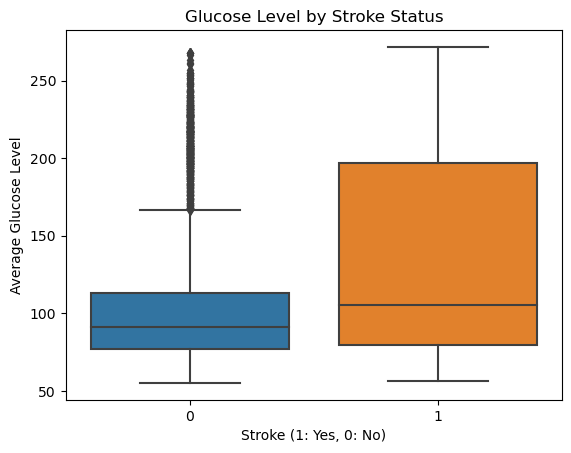

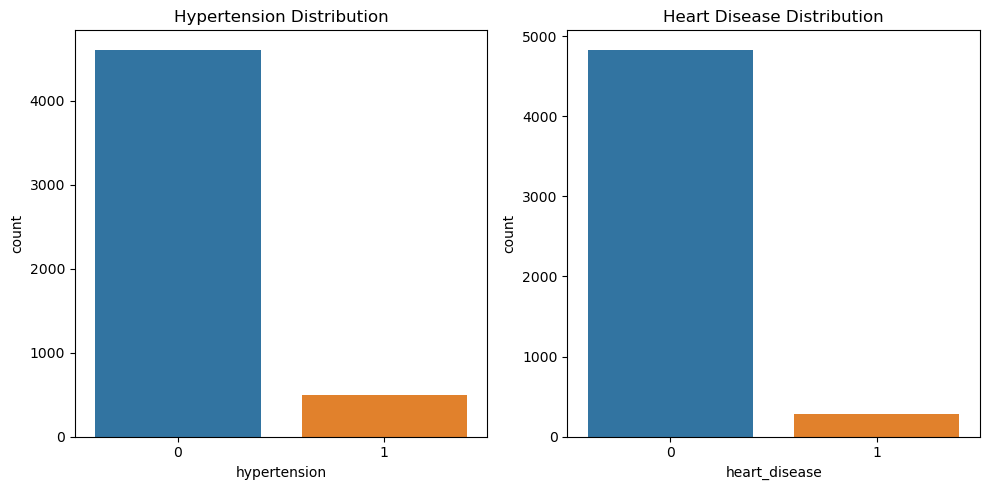

In [10]:
#CORRELATION - GLUCOSE AND STROKE

# Boxplot for glucose level by stroke status
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Glucose Level by Stroke Status')
plt.xlabel('Stroke (1: Yes, 0: No)')
plt.ylabel('Average Glucose Level')
plt.show()

# Countplot for hypertension and heart disease
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='hypertension', data=df)
plt.title('Hypertension Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='heart_disease', data=df)
plt.title('Heart Disease Distribution')

plt.tight_layout()
plt.show()



/var/folders/rh/h2tzx6sx7q91t3_t9kp0sbxr0000gn/T/ipykernel_75140/1266905283.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:, 'gender'] = labelencoder.fit_transform(dataframe['gender'])
/var/folders/rh/h2tzx6sx7q91t3_t9kp0sbxr0000gn/T/ipykernel_75140/1266905283.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:, 'gender'] = labelencoder.fit_transform(dataframe['gender'])
/var/folders/rh/h2tzx6sx7q91t3_t9kp0sbxr0000gn/T/ipykernel_75140/1266905283.py:13: SettingWithCopyWarning: 
A value i

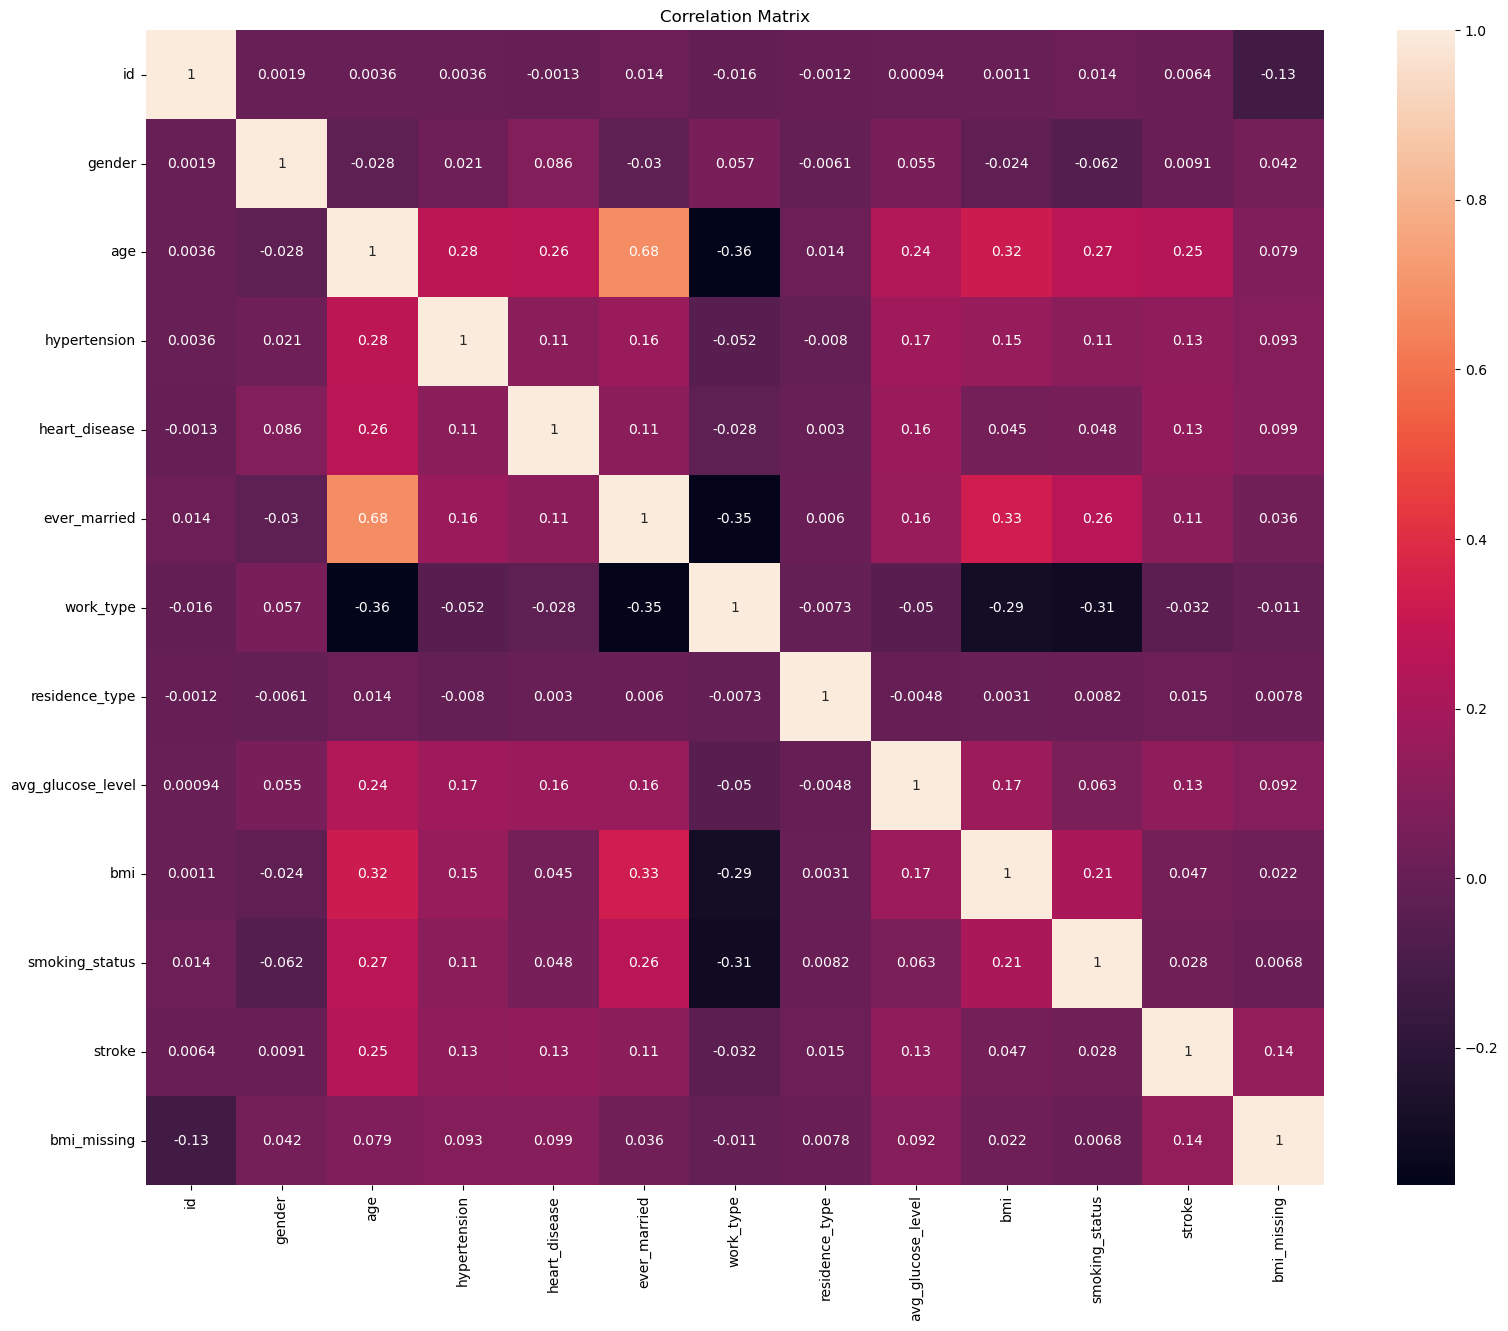

In [12]:
#BODY MASS INDEX

def preprocessed_corr(dataframe):
    
    
    # There is 1 row with "Other" as the gender
    # While it is a controversial topic, 
    # for the sake of this dataset (and my personal beliefs), this row will be dropped
    dataframe = dataframe[dataframe['gender'] != "Other"]
    dataframe.loc[:, 'gender'] = labelencoder.fit_transform(dataframe['gender'])
    
    # Age is an integer... not a float
    dataframe['age'] = dataframe['age'].astype(int)
    
    # ever_married is basically a binary category (Yes / No)
    dataframe.loc[:, 'ever_married'] = labelencoder.fit_transform(dataframe['ever_married'])
    
    # work_type has multiple categories, but non-ordinal (Private, Self-employed, Govt_job, children, never_worked)
    dataframe.loc[:, 'work_type'] = labelencoder.fit_transform(dataframe['work_type'])
    
    # residence_type is binary category (Urban / Rural)
    dataframe.rename(columns={"Residence_type": "residence_type"}, inplace=True)
    dataframe.loc[:, 'residence_type'] = labelencoder.fit_transform(dataframe['residence_type'])
    
    # avg_glucose_level may require some form of grouping?
    # Addressed later
    
    # BMI has 201 missing values (4% of the values)
    ## We mark down the missing values into a separate column to see if there are correlation between missing values and other categories
    dataframe['bmi_missing'] = dataframe['bmi'].isnull().astype(int)
    
    ## We then use interpolation to fill in the null values
    dataframe['bmi'].interpolate(inplace=True)

    
    
    # smoking_status is categorical (never smoked, formerly smoked, smokes, and unknown)
    dataframe.loc[:, 'smoking_status'] = labelencoder.fit_transform(dataframe['smoking_status'])

    ## How to address unknown values in smoking column?
    ## Cannot drop the unknown values because it makes up 30% of the values
    
    
    return dataframe


corr_df = preprocessed_corr(original_df)

plt.figure(figsize=(19, 15))
correlation_matrix = corr_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()



In [ ]:
#model Training and testing

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022



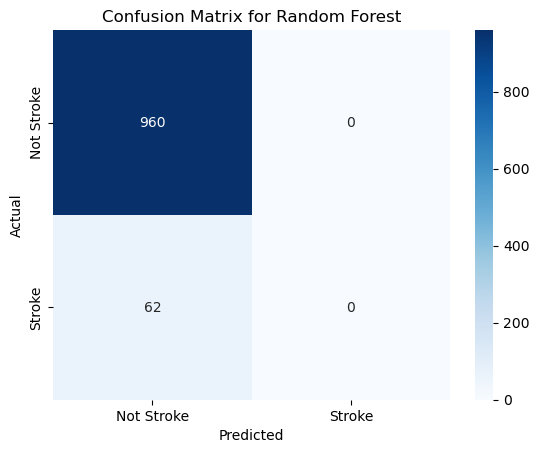

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



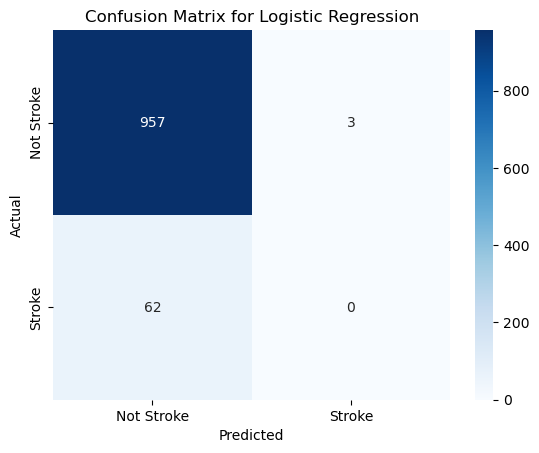

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022



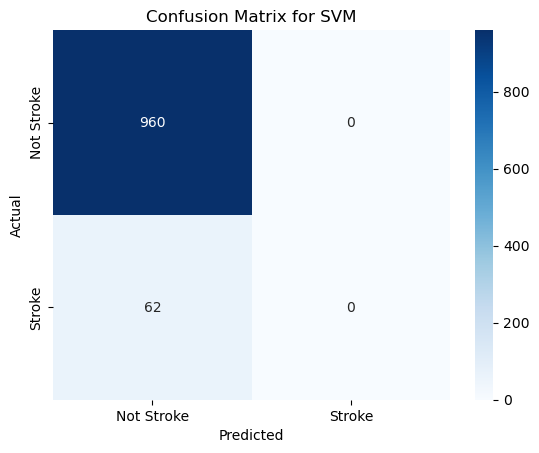

Accuracies: {'Random Forest': 0.9393346379647749, 'Logistic Regression': 0.9363992172211351, 'SVM': 0.9393346379647749}
The most accurate model is: Random Forest with an accuracy of 0.9393346379647749


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('healthcare-dataset-stroke-data.csv')


data['bmi'].fillna(data['bmi'].mean(), inplace=True)


data = pd.get_dummies(data, drop_first=True)


X = data.drop('stroke', axis=1)
y = data['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {'Random Forest': RandomForestClassifier(),
          'Logistic Regression': LogisticRegression(),
          'SVM': SVC()}


accuracies = {}
confusion_matrices = {}


for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cnf_matrix

    
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred, zero_division=1))  
    
    plt.figure()
    sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Stroke', 'Stroke'], yticklabels=['Not Stroke', 'Stroke'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


print("Accuracies:", accuracies)

#most accurate model
best_model = max(accuracies, key=accuracies.get)
print(f"The most accurate model is: {best_model} with an accuracy of {accuracies[best_model]}")


In [5]:
#Asking for user input
print("Please answer the following questions to predict your stroke risk:")


hypertension_options = {1: 'Yes', 0: 'No'}
heart_disease_options = {1: 'Yes', 0: 'No'}
married_options = {1: 'Yes', 0: 'No'}
work_type_options = {'1': 'Private', '2': 'Self-employed', '3': 'Govt_job', '4': 'children', '5': 'Never_worked'}
residence_options = {'1': 'Urban', '2': 'Rural'}
smoking_status_options = {'1': 'Never Smoked', '2': 'formerly smoked', '3': 'smokes', '4': 'Unknown'}
gender_options = {'1': 'Male', '2': 'Female'}


user_input = {}

print("Select your gender:")
for key, value in gender_options.items():
    print(f"{key}: {value}")
user_input['gender'] = gender_options[input("Enter the corresponding number: ")]

print("Enter your age:")
user_input['age'] = float(input())

print("Do you have hypertension?")
for key, value in hypertension_options.items():
    print(f"{key}: {value}")
user_input['hypertension'] = float(input("Enter the corresponding number: "))

print("Do you have heart disease?")
for key, value in heart_disease_options.items():
    print(f"{key}: {value}")
user_input['heart_disease'] = float(input("Enter the corresponding number: "))

print("Are you married?")
for key, value in married_options.items():
    print(f"{key}: {value}")
user_input['ever_married_Yes'] = float(input("Enter the corresponding number: "))

print("What is your work type?")
for key, value in work_type_options.items():
    print(f"{value}: {key}")
user_input['work_type'] = float(input("Enter the corresponding number: "))

print("Where do you live (Urban/Rural)?")
for key, value in residence_options.items():
    print(f"{value}: {key}")
user_input['Residence_type'] = float(input("Enter the corresponding number: "))

print("Enter your average glucose level:")
user_input['avg_glucose_level'] = float(input())

print("Enter your BMI:")
user_input['bmi'] = float(input())

print("Do you smoke?")
for key, value in smoking_status_options.items():
    print(f"{value}: {key}")
user_input['smoking_status'] = float(input("Enter the corresponding number: "))


user_input_df = pd.DataFrame(user_input, index=[0])


user_input_df = user_input_df.reindex(columns=X.columns, fill_value=0)


best_model_instance = models[best_model]


prediction = best_model_instance.predict(user_input_df)
print("Prediction of Stroke Risk (1 for High Risk, 0 for Low Risk):", prediction,"\n\n")


if prediction == 1:
    print("The model predicts that the user has a risk of stroke\n")
else:
    print("The model predicts that the user does not have a risk of stroke\n")

Please answer the following questions to predict your stroke risk:
Select your gender:
1: Male
2: Female


Enter the corresponding number:  1


Enter your age:


 30


Do you have hypertension?
1: Yes
0: No


Enter the corresponding number:  0


Do you have heart disease?
1: Yes
0: No


Enter the corresponding number:  0


Are you married?
1: Yes
0: No


Enter the corresponding number:  1


What is your work type?
Private: 1
Self-employed: 2
Govt_job: 3
children: 4
Never_worked: 5


Enter the corresponding number:  1


Where do you live (Urban/Rural)?
Urban: 1
Rural: 2


Enter the corresponding number:  1


Enter your average glucose level:


 100


Enter your BMI:


 36


Do you smoke?
Never Smoked: 1
formerly smoked: 2
smokes: 3
Unknown: 4


Enter the corresponding number:  1


Prediction of Stroke Risk (1 for High Risk, 0 for Low Risk): [0] 


The model predicts that the user does not have a risk of stroke



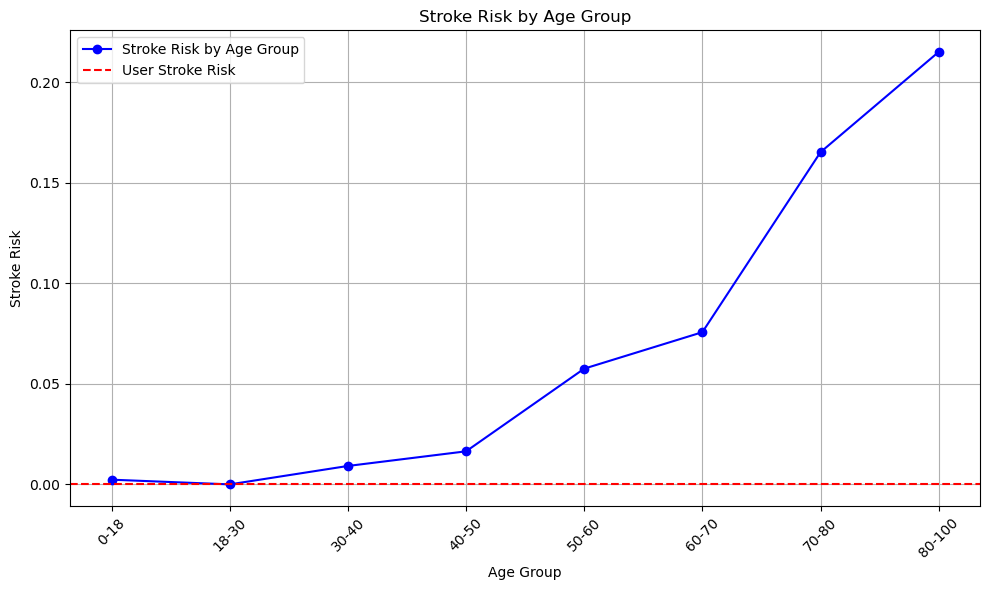

In [6]:
#Stroke Risk
#Age user vs data

age_groups = [(0, 18), (18, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 100)]

user_age = user_input['age']
age_group_stroke_rate = []  


for lower, upper in age_groups:
    age_group_data = data[(data['age'] >= lower) & (data['age'] < upper)]
    age_group_stroke_rate.append(age_group_data['stroke'].mean())



plt.figure(figsize=(10, 6))
plt.plot(range(len(age_groups)), age_group_stroke_rate, marker='o', linestyle='-', color='b', label='Stroke Risk by Age Group')
plt.axhline(y=prediction, color='r', linestyle='--', label='User Stroke Risk')
plt.xlabel('Age Group')
plt.ylabel('Stroke Risk')
plt.title('Stroke Risk by Age Group')
plt.xticks(range(len(age_groups)), [f'{lower}-{upper}' for lower, upper in age_groups], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


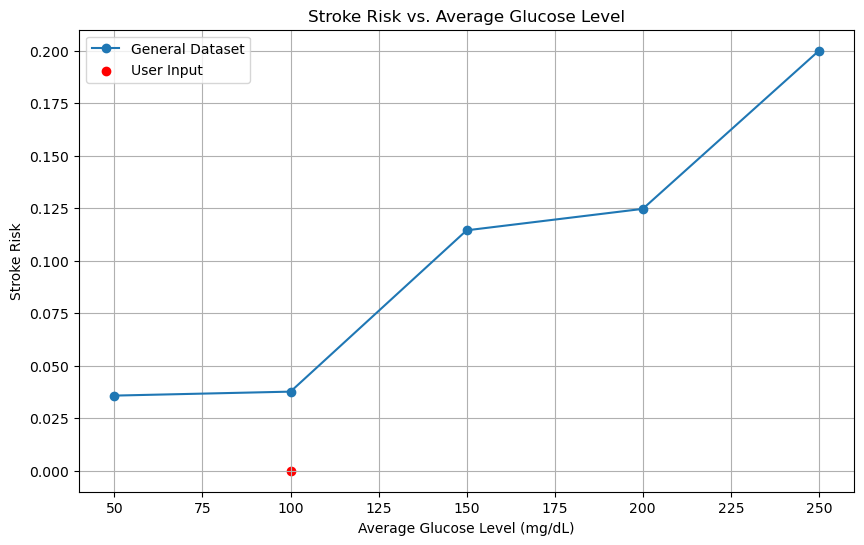

In [7]:
#avg.Glucose level user vs data
glucose_bins = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]


glucose_bin_stroke_rate = []


for i in range(len(glucose_bins) - 1):
    glucose_bin_data = data[(data['avg_glucose_level'] >= glucose_bins[i]) & (data['avg_glucose_level'] < glucose_bins[i + 1])]
    glucose_bin_stroke_rate.append(glucose_bin_data['stroke'].mean())


plt.figure(figsize=(10, 6))
plt.plot(glucose_bins[:-1], glucose_bin_stroke_rate, marker='o', linestyle='-', label='General Dataset')
plt.scatter(user_input['avg_glucose_level'], prediction, color='red', label='User Input')
plt.xlabel('Average Glucose Level (mg/dL)')
plt.ylabel('Stroke Risk')
plt.title('Stroke Risk vs. Average Glucose Level')
plt.legend()
plt.grid(True)
plt.show()


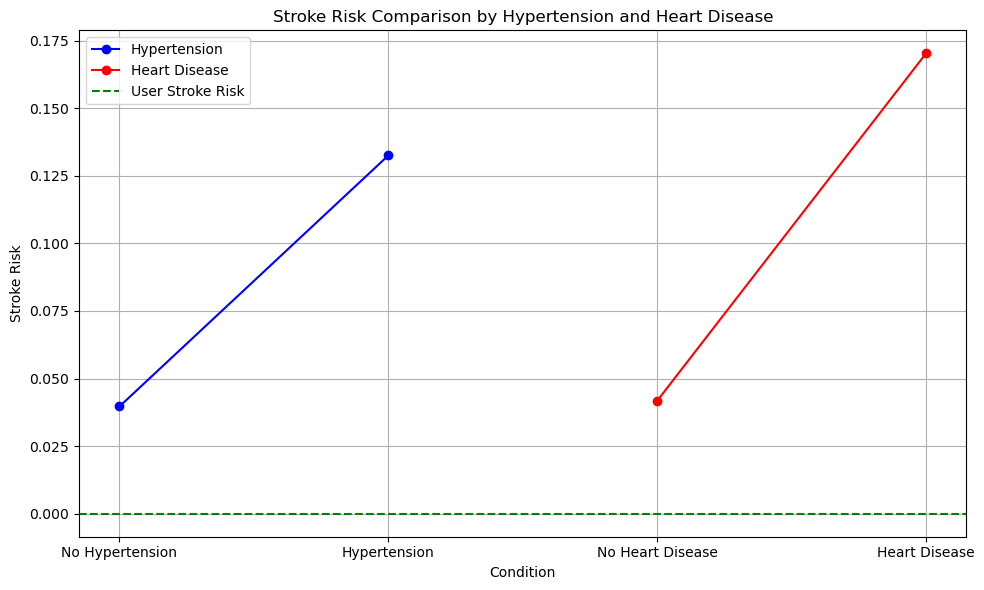

In [10]:
#Hypertension and HeartDisease - User vs Data
# Calculate stroke rate for users with and without hypertension
hypertension_stroke_rate = data.groupby('hypertension')['stroke'].mean()

# Calculate stroke rate for users with and without heart disease
heart_disease_stroke_rate = data.groupby('heart_disease')['stroke'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(['No Hypertension', 'Hypertension'], hypertension_stroke_rate.values, marker='o', color='b', label='Hypertension')
plt.plot(['No Heart Disease', 'Heart Disease'], heart_disease_stroke_rate.values, marker='o', color='r', label='Heart Disease')
plt.axhline(y=prediction, color='g', linestyle='--', label='User Stroke Risk')
plt.xlabel('Condition')
plt.ylabel('Stroke Risk')
plt.title('Stroke Risk Comparison by Hypertension and Heart Disease')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


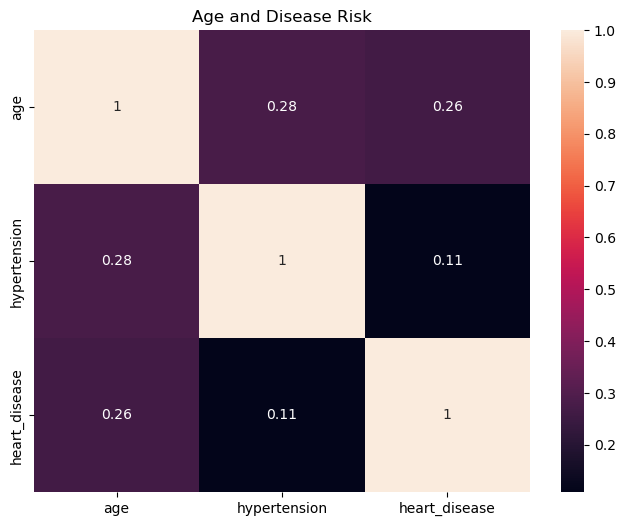

Age and Disease Risk (Hypertension, Heart Disease):

There is a moderate positive correlation between age and hypertension.
There is a moderate positive correlation between age and heart disease.
Conclusion: Older individuals are more likely to have hypertension and heart disease.


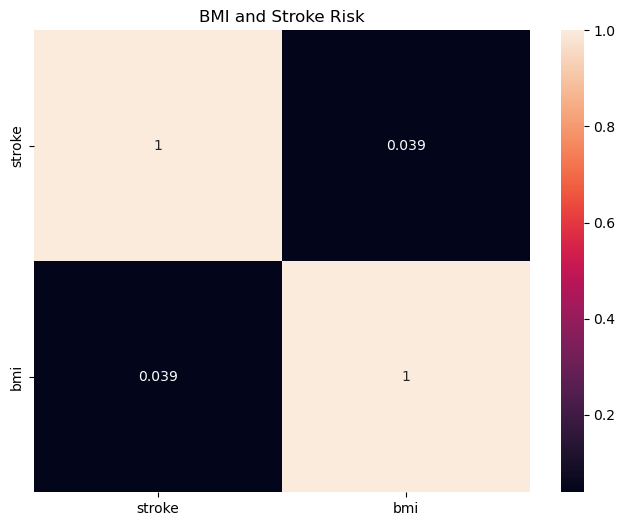

BMI and Stroke Risk:

There is no significant correlation between BMI and stroke risk.
Conclusion: BMI alone may not be a strong predictor of stroke risk in this dataset.


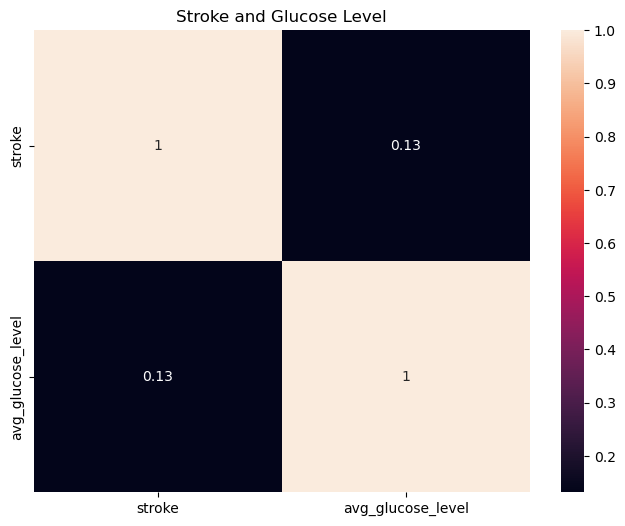

Glucose Level and Stroke Risk:

There is no significant correlation between average glucose level and stroke risk.
Conclusion: Average glucose level alone may not be a strong predictor of stroke risk in this dataset.


In [48]:
import seaborn as sns

#Age and Disease Risk
df_analysis_1 = data[['age', 'hypertension', 'heart_disease']]
plt.figure(figsize=(8, 6))
sns.heatmap(df_analysis_1.corr(), annot=True)
plt.title('Age and Disease Risk')
plt.show()

print("Age and Disease Risk (Hypertension, Heart Disease):\n")

print("There is a moderate positive correlation between age and hypertension.")
print("There is a moderate positive correlation between age and heart disease.")
print("Conclusion: Older individuals are more likely to have hypertension and heart disease.")

#BMI and Stroke Risk
df_analysis_3 = data[['stroke', 'bmi']]
plt.figure(figsize=(8, 6))
sns.heatmap(df_analysis_3.corr(), annot=True)
plt.title('BMI and Stroke Risk')
plt.show()

print("BMI and Stroke Risk:\n")

print("There is no significant correlation between BMI and stroke risk.")
print("Conclusion: BMI alone may not be a strong predictor of stroke risk in this dataset.")

#Stroke and Glucose Level
df_analysis_4 = data[['stroke', 'avg_glucose_level']]
plt.figure(figsize=(8, 6))
sns.heatmap(df_analysis_4.corr(), annot=True)
plt.title('Stroke and Glucose Level')
plt.show()

print("Glucose Level and Stroke Risk:\n")

print("There is no significant correlation between average glucose level and stroke risk.")
print("Conclusion: Average glucose level alone may not be a strong predictor of stroke risk in this dataset.")